<a href="https://colab.research.google.com/github/trellums/DS-Unit-2-Linear-Models/blob/master/covid_predict_Build_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this is correct but not as big or fun as id hoped.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import preprocessing, metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('covidpredict.csv', index_col='date')

In [4]:
!pip install pandas-profiling==2.*

     |████████████████████████████████| 266kB 2.4MB/s 
     |████████████████████████████████| 3.1MB 10.4MB/s 
     |████████████████████████████████| 71kB 1.2MB/s 
     |████████████████████████████████| 71kB 1.3MB/s 
     |████████████████████████████████| 71kB 2.2MB/s 
     |████████████████████████████████| 604kB 27.4MB/s 
     |████████████████████████████████| 296kB 33.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=70520219150ea67d26c1b81273601082e6976e95dab075f52891113ae10bd9b7
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=58cd31ad97184096ab73b03ef45cd593eb1aeeae0a2aa5192ef7031949d209a5
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Un

In [5]:
# What in the EDA man these columns are bogus...

In [6]:
df.drop(labels=(['new_cases','new_tests','total_cases','total_tests','new_deaths','population','population_density','aged_65_older','aged_70_older','cardiovasc_death_rate','female_smokers','male_smokers','hospital_beds_per_thousand','tests_units','continent','iso_code','new_cases_smoothed','new_deaths_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','median_age','gdp_per_capita','extreme_poverty','diabetes_prevalence','handwashing_facilities','life_expectancy','human_development_index']),axis=1, inplace=True)

In [7]:
#from pandas_profiling import ProfileReport
#ProfileReport(df)

In [8]:
df.head()

,location,total_deaths,tests_per_case,positive_rate,stringency_index
date,,,,,
2019-12-31,Afghanistan,0.0,NaN,NaN,NaN
2020-01-01,Afghanistan,0.0,NaN,NaN,0.0
2020-01-02,Afghanistan,0.0,NaN,NaN,0.0
2020-01-03,Afghanistan,0.0,NaN,NaN,0.0
2020-01-04,Afghanistan,0.0,NaN,NaN,0.0


In [9]:
df.tail()

,location,total_deaths,tests_per_case,positive_rate,stringency_index
date,,,,,
2020-09-18,International,7.0,NaN,NaN,NaN
2020-09-19,International,7.0,NaN,NaN,NaN
2020-09-20,International,7.0,NaN,NaN,NaN
2020-09-21,International,7.0,NaN,NaN,NaN
2020-09-22,International,7.0,NaN,NaN,NaN


In [10]:
df.shape

(45418, 5)

In [11]:
# This looks ugly man not gonna lie BUT..
df.isnull().sum()

location                0
total_deaths          603
tests_per_case      29086
positive_rate       28702
stringency_index     7670
dtype: int64

In [12]:
# I just want this guy mr. red white and blues data nan's and all
unif = ['United States']

In [13]:
unif_explained = df['location'].isin(unif)

In [14]:
#awe here it is
Usa_0 = df[unif_explained]

In [15]:
Usa_0.drop(labels='location',axis=1,inplace=True)
# i guess this will help but 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
Usa_0.head(100)

,total_deaths,tests_per_case,positive_rate,stringency_index
date,,,,
2019-12-31,0.0,NaN,NaN,NaN
2020-01-01,0.0,NaN,NaN,0.00
2020-01-02,0.0,NaN,NaN,0.00
2020-01-03,0.0,NaN,NaN,0.00
2020-01-04,0.0,NaN,NaN,0.00
...,...,...,...,...
2020-04-04,7157.0,5.175,0.193,72.69
2020-04-05,8501.0,4.940,0.202,72.69
2020-04-06,9647.0,4.875,0.205,72.69


In [17]:
Usa_0.tail()

,total_deaths,tests_per_case,positive_rate,stringency_index
date,,,,
2020-09-18,197633.0,NaN,NaN,NaN
2020-09-19,198589.0,NaN,NaN,NaN
2020-09-20,199258.0,NaN,NaN,NaN
2020-09-21,199509.0,NaN,NaN,NaN
2020-09-22,199881.0,NaN,NaN,NaN


In [18]:
# Need to rid horrible inputs now!
# Lets find em !

In [19]:
Usa_0.shape

(267, 4)

In [20]:
# Looking way better / Duplicates ?
Usa_0.isnull().sum()

total_deaths         0
tests_per_case      73
positive_rate       73
stringency_index    12
dtype: int64

In [21]:
# I should do the other top contenders that are upp!
# BUT == we should take down columns first had to swing that up cause why not we dont need anywhere for this see .drop up top

In [22]:
Target = 'total_deaths'
y = Usa_0['total_deaths']
X = Usa_0.drop(['total_deaths'], axis=1)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

for var in X_train, X_val, y_train, y_val :
  print('dtype:', type(var))
  print('shape:', var.shape)

dtype: <class 'pandas.core.frame.DataFrame'>
shape: (200, 3)
dtype: <class 'pandas.core.frame.DataFrame'>
shape: (67, 3)
dtype: <class 'pandas.core.series.Series'>
shape: (200,)
dtype: <class 'pandas.core.series.Series'>
shape: (67,)


In [24]:
assert X_train.shape[0] + X_val.shape[0] == X.shape[0]

In [25]:
y_train.mean()

79437.805

In [26]:
X_train.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [27]:
X_train.head()

,tests_per_case,positive_rate,stringency_index
date,,,
2020-03-08,18.962,0.053,20.37
2020-08-04,13.391,0.075,67.13
2020-06-07,23.428,0.043,72.69
2020-02-24,NaN,NaN,5.56
2020-07-04,15.413,0.065,68.98


In [28]:
from xgboost.sklearn import XGBRegressor

In [30]:
# Instantiate our pipeline
model = make_pipeline(
#    OneHotEncoder(),
    SimpleImputer(),
    StandardScaler(),
    XGBRegressor( n_estimators=100,random_state=42))

model.fit(X_train,y_train)

[14:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight

In [31]:
print('Training Accuracy:', model.score(X_train, y_train))
print('Validation Accuracy:', model.score(X_val, y_val))

Training Accuracy: 0.9482881580323549
Validation Accuracy: 0.8264549324454235


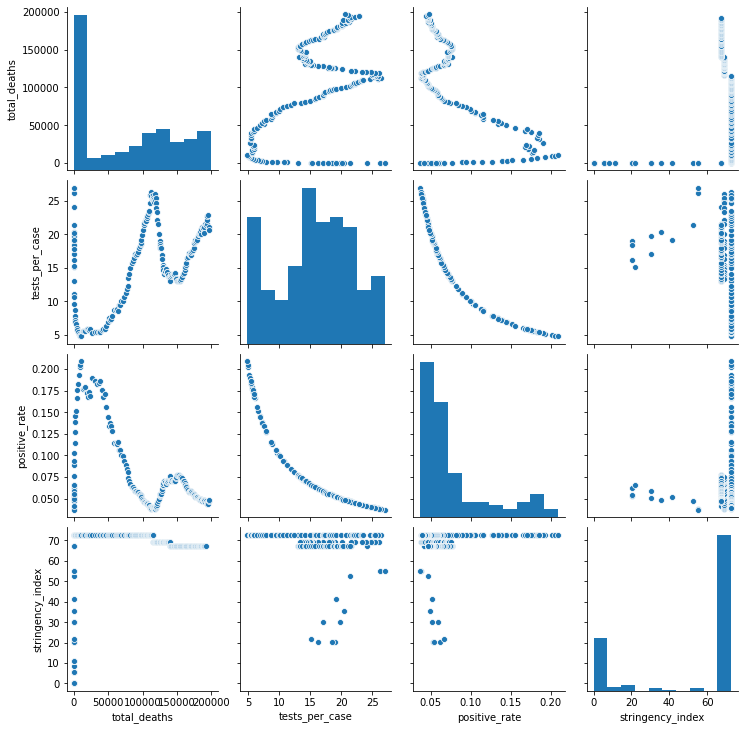

In [33]:
sns.pairplot(Usa_0)

In [ ]:
# feature importances?!?!? this way human
 #
  #
   #

[14:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


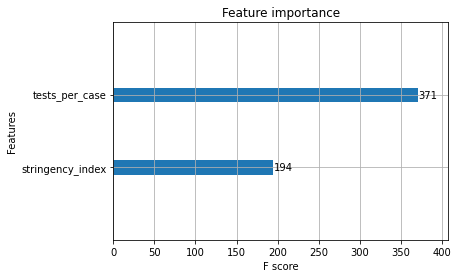

In [34]:
# with this type of graphing it tells me how important each feature is to my model and seems to always drop the lowest feature in the bunch with mine had to drop all the way down to only 3 features :c
# Due to a lot of leakage and absurd scores and checking my profile report it looks most realistic and not a bad score for the XGBRegressor.
import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train,y_train)
axsub = xgb.plot_importance(model_xgb)

In [36]:
model_poo = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression())

model_poo.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [37]:
print('Training Accuracy:', model_poo.score(X_train, y_train))
print('Validation Accuracy:', model_poo.score(X_val, y_val))

Training Accuracy: 0.26
Validation Accuracy: 0.208955223880597


In [40]:
modelt = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor())

modelt.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n

In [41]:
print('Training Accuracy:', modelt.score(X_train, y_train))
print('Validation Accuracy:', modelt.score(X_val, y_val))

Training Accuracy: 0.9414595809826286
Validation Accuracy: 0.8027758887388788
